<center><h2>Assignment 2 - Pranav K Nayak </h2></center>
<center><h3>ES20BTECH11035</h3></center>

---

### Problem 1: Value Iteration

**a) Prove that the Bellman Optimality Operator is a contraction under max-norm**<br>
**Solution**:
We first establish that we're working within the vector space of state-value functions, $\mathcal V$. This  is a $|\mathcal S|$-dimensional vector space, since each vector is a value function for each of the $|\mathcal S|$ states.

We define the Bellman Optimality Operator within this vector space to be 
$$
T^* (v) = \max\limits_{a \in \mathcal A} \ (\mathcal R^a + \gamma \mathcal P^a v )
$$

The max norm for any two vectors in $\mathcal V$ is defined as
$$
||u - v||_\infty = \max\limits_{s \in \mathcal S} |u(s) - v(s)|
$$

We first prove the lemma that 
$$
|\max\limits_a f(a) - \max\limits_a g(a)| \leq \max\limits_a |f(a) - g(a)|
$$

Without loss of generality, let's assume that 
$$
\max\limits_a f(a) \geq \max\limits_a g(a)
$$
If we denote $a^* = \arg\max\limits_a f(a)$
$$
\begin{align*}
|\max\limits_a f(a) - \max\limits_a g(a)| &= \max\limits_a f(a) - \max\limits_a g(a) \\
&= f(a^*) - \max\limits_a g(a) \\
&\leq f(a^*) - g(a^*) \\ 
&\leq \max\limits_a |f(a) - g(a)|
\end{align*}
$$

Now, for any two vectors $v, u \in \mathcal S$, we have
$$
\begin{align*}
||T^* v - T^*u||_\infty &= ||\max\limits_a (\mathcal R^a + \gamma \mathcal P^a v ) - \max\limits_a (\mathcal R^a + \gamma \mathcal P^a u )||_\infty \\
&\leq \max\limits_a  || (\mathcal R^a + \gamma \mathcal P^a v) -  (\mathcal R^a + \gamma \mathcal P^a u ) ||_\infty \\
&= \gamma||\mathcal P^{a^*} (v - u)||_\infty \\
&\leq \gamma ||\mathcal P^{a^*}||_\infty ||v - u||_\infty \\
&= \gamma ||v - u||_\infty
\end{align*}
$$
Where $a^* = \arg\max\limits_a \biggl (\gamma \mathcal P^a (v-u) \biggr)$
The final equality comes from the fact that the max-norm of a stochastic matrix is $1$.
Finally, since $\gamma < 1$, we have that $T^*$ is a contraction under max-norm.

**b) Prove that the iterative policy evaluatiion algorithm converges geometrically. <br>**
**Solution**: <br>
Working in the same vector space as *1a*, we define the Bellman Expectation Operator as $T^\pi (v) = \mathcal R^\pi + \gamma \mathcal P^\pi v $
We saw in class that this operator is a contraction mapping, i.e.
$$
||T^\pi v - T^\pi u||_\infty \leq \gamma ||v - u||_\infty
$$
The proof of this is very similar to the proof for the Bellman Optimality Operator, and is given below
$$
\begin{align*}
||T^\pi v - T^\pi u||_\infty &= ||\mathcal R^\pi + \gamma \mathcal P^\pi v - \mathcal R^\pi - \gamma \mathcal P^\pi u||_\infty \\
&= \gamma ||\mathcal P^\pi (v - u)||_\infty \\
&\leq \gamma ||v - u||_\infty
\end{align*}
$$

Let $v^\pi$ be the fixed point under the operator $T^\pi$, i.e. $T^\pi v^\pi = v^\pi$. Also let $v_k$ be a value function that is obtained after the $k^{th}$ step of policy iteration. Then
$$
\begin{align*}
||T^\pi v_k - T^\pi v^\pi||_\infty &\leq \gamma||v_k - v^\pi||_\infty \\
\implies ||v_{k+1} - v^\pi||_\infty &\leq \gamma||v_k - v^\pi||_\infty \\
\end{align*}
$$ 
Inductively, we can see that 
$||v_{k} - v^\pi||_\infty \leq \gamma ||v_{k-1} - v^\pi||_\infty$ <br>

Thus,
$$
\begin{align*}
||v_{k+1} - v^\pi||_\infty &\leq \gamma ||v_{k} - v^\pi||_\infty \\
&\leq \gamma^2 ||v_{k-1} - v^\pi||_\infty \\
&\leq \gamma^3 ||v_{k-2} - v^\pi||_\infty \\
&\vdots \\
&\leq \gamma^k ||v_{1} - v^\pi||_\infty \\
\end{align*}
$$
Hence proved


**c) Let $M$ be an infinite horizon MDP and $V^*$ be its optimal value function. Suppose that the value iteration algorithm is terminated after $k+1$ iterations, such that $||V_{k+1} - V_k||_\infty \lt \epsilon$** for some chosen $\epsilon \gt 0$. How far is the estimate $V_{k+1}$ from the optimal value function $V^*$? <br>
**Solution**: <br>
We know from *1a* that the Bellman Optimality Operator $T^*$ is a contraction mapping, meaning that if we were to continue our iterative application of it during the value iteration algorithm, we can find a relation between the $||V_{k+1} - V_k||_\infty$ that we stopped at, and subsequent such max-norms.
$$
\begin{align*}
||T^* V_{k+1} - T^* V_k||_\infty &\leq \gamma ||V_{k+1} - V_k||_\infty \lt \epsilon \\
\implies ||V_{k+2} - V_{k+1}||_\infty &\leq \gamma ||V_{k+1} - V_k||_\infty \lt \gamma \epsilon \\
\implies ||V_{k+3} - V_{k+2}||_\infty &\leq \gamma ||V_{k+2} - V_{k+1}||_\infty \lt \gamma^2 \epsilon \\
\implies ||V_{k+4} - V_{k+3}||_\infty &\leq \gamma ||V_{k+3} - V_{k+2}||_\infty \lt \gamma^3 \epsilon \\
&\vdots \\
\implies ||V_{k+n} - V_{k+n-1}||_\infty &\leq \gamma ||V_{k+n-1} - V_{k+n-2}||_\infty \lt \gamma^{n-1} \epsilon \\
\end{align*}
$$

Thus, we see that
$$
\begin{align*}
||V_{k+n} - V_{k+1}||_\infty &= ||(V_{k+n} - V_{k+n - 1}) + (V_{k+n - 1} - V_{k+n-2}) + \dots + (V_{k+2} - V_{k+1})||_\infty \\
&\leq ||V_{k+n} - V_{k+n - 1}||_\infty + ||V_{k+n - 1} - V_{k+n-2}||_\infty + \dots + ||V_{k+2} - V_{k+1}||_\infty \\
&\lt \gamma^{n-1} \epsilon + \gamma^{n-2} \epsilon + \dots + \gamma \epsilon \\
\therefore ||V_{k+n} - V_{k+1}||_\infty &\lt \sum\limits_{i=1}^{n-1} \gamma^{i} \epsilon \\
\end{align*}
$$

We know from the convergence of value iteration that $\lim_{n \rightarrow \infty} V_n = V^*$. Applying this limit to the above inequality, we get
$$
\lim_{n \rightarrow \infty} ||V_{k+n} - V_{k+1}||_\infty \lt \lim_{n \rightarrow \infty} \sum\limits_{i=1}^{n-1} \gamma^{i} \epsilon = \frac{\gamma\epsilon}{1 - \gamma}
$$

Thus, we see that the estimate $V_{k+1}$ is at most $\frac{\gamma\epsilon}{1 - \gamma}$ away from the optimal value function $V^*$ under max-norm.

---

### Problem 2: Programming Value Iteration

**a) Implementing Value- and Policy-Iteration and b) Documenting Findings**

In [23]:
import numpy as np
import gymnasium as gym
from gymnasium import Env
import matplotlib.pyplot as plt

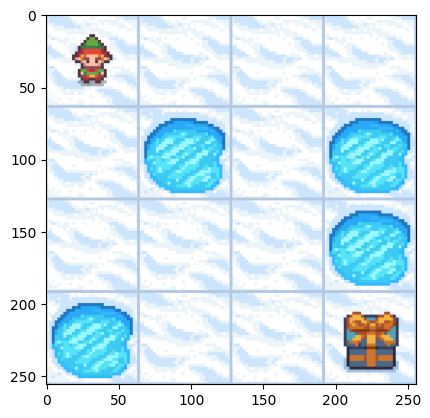

In [24]:
frozen_lake = gym.make('FrozenLake-v1', desc=None, map_name='4x4', is_slippery=False, render_mode='rgb_array')
frozen_lake.reset()
img = frozen_lake.render()
plt.imshow(img)

In [25]:
dynamics = frozen_lake.unwrapped.P
n_states = frozen_lake.observation_space.n
n_actions = frozen_lake.action_space.n
dynamics

{0: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 4, 0.0, False)],
  2: [(1.0, 1, 0.0, False)],
  3: [(1.0, 0, 0.0, False)]},
 1: {0: [(1.0, 0, 0.0, False)],
  1: [(1.0, 5, 0.0, True)],
  2: [(1.0, 2, 0.0, False)],
  3: [(1.0, 1, 0.0, False)]},
 2: {0: [(1.0, 1, 0.0, False)],
  1: [(1.0, 6, 0.0, False)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 2, 0.0, False)]},
 3: {0: [(1.0, 2, 0.0, False)],
  1: [(1.0, 7, 0.0, True)],
  2: [(1.0, 3, 0.0, False)],
  3: [(1.0, 3, 0.0, False)]},
 4: {0: [(1.0, 4, 0.0, False)],
  1: [(1.0, 8, 0.0, False)],
  2: [(1.0, 5, 0.0, True)],
  3: [(1.0, 0, 0.0, False)]},
 5: {0: [(1.0, 5, 0, True)],
  1: [(1.0, 5, 0, True)],
  2: [(1.0, 5, 0, True)],
  3: [(1.0, 5, 0, True)]},
 6: {0: [(1.0, 5, 0.0, True)],
  1: [(1.0, 10, 0.0, False)],
  2: [(1.0, 7, 0.0, True)],
  3: [(1.0, 2, 0.0, False)]},
 7: {0: [(1.0, 7, 0, True)],
  1: [(1.0, 7, 0, True)],
  2: [(1.0, 7, 0, True)],
  3: [(1.0, 7, 0, True)]},
 8: {0: [(1.0, 8, 0.0, False)],
  1: [(1.0, 12, 0.0, True)],
  2: [(

#### Function Definitions

In [26]:
def uniform_policy(n_states, n_actions):
    policy = np.ones((n_states, n_actions)) / n_actions
    return policy


In [27]:
def mdp_to_mrp(policy, dynamics, n_states, n_actions):
  P_pi = np.zeros([n_states, n_states])
  R_pi = np.zeros([n_states])
  for s in range(n_states):
    for a in range(n_actions):
      for p_ssa, s_prime, reward, _ in dynamics[s][a]:
        P_pi[s, s_prime] += policy[s, a]*p_ssa
        R_pi[s] += policy[s,a] * p_ssa * reward
  assert np.all(np.sum(P_pi, axis=1) == 1), "Not a Valid Probability Distribution"
  return P_pi, R_pi

In [28]:
def max_norm(u, v):
  return np.max(np.abs(v-u))

In [29]:
def policy_evaluation(policy, dynamics, n_states, n_actions, gamma = 1, epsilon=1e-10, debug=False):
  P_pi, R_pi = mdp_to_mrp(policy, dynamics, n_states, n_actions)
  V_new = np.zeros([n_states])
  iterations = 0
  while True:
    iterations += 1
    V_old = V_new.copy()
    V_new = R_pi + gamma * P_pi @ V_old
    if max_norm(V_old, V_new) < epsilon:
      break
    # if iterations == 100:
      # break
  if debug:
    return V_new.reshape(np.int32(np.sqrt(n_states)), -1), iterations
  else:
    return V_new.reshape(np.int32(np.sqrt(n_states)), -1)

In [30]:
def compute_action_value(value_fn, dynamics, n_states, n_actions, gamma=0.9):
  q = np.zeros([n_states, n_actions])
  flattened_v = value_fn.ravel()
  for s in range(n_states):
    for a in range(n_actions):
      for p_ssa, s_prime, reward, _ in dynamics[s][a]:
        q[s, a] += p_ssa * (reward + gamma * flattened_v[s_prime])
  return q

In [31]:
def greedy(value_fn, dynamics, n_states, n_actions, gamma=0.9):
  q = compute_action_value(value_fn, dynamics, n_states, n_actions, gamma)
  policy = np.zeros([n_states, n_actions])
  for s in range(n_states):
    a_star_idx = np.where(q[s, :] == np.max(q[s, :]))
    policy[s, a_star_idx] = 1/np.size(a_star_idx)
  return policy

In [32]:
def policy_iteration(policy, dynamics, n_states, n_actions, gamma=0.9, epsilon=1e-10):
  v_old = np.zeros([n_states]).reshape([np.int32(np.sqrt(n_states)), -1 ])
  iterations = 0
  while True:
    iterations += 1
    policy = greedy(v_old, dynamics, n_states, n_actions, gamma)
    v_new = policy_evaluation(policy, dynamics, n_states, n_actions, gamma)
    if max_norm(v_old, v_new) < epsilon:
      break
    v_old = v_new.copy()
    
  return v_new, policy, iterations

In [33]:
def value_iteration(dynamics, n_states, n_actions, gamma=0.9, epsilon=1e-10):
  v_old = np.zeros([n_states])
  v_new = np.zeros([n_states])
  iterations = 0
  while True:
    iterations += 1
    for s in range(n_states):
      for a in range(n_actions):
        bellman_term = sum([p_ssa*(reward + gamma*v_old[s_prime]) for p_ssa, s_prime, reward, _ in dynamics[s][a]])
        v_new[s] = max(bellman_term, v_new[s])
    if max_norm(v_new, v_old) < epsilon:
      break
    v_old = v_new.copy()
  return v_new.reshape([np.int32(np.sqrt(n_states)), -1]), iterations

#### Testing

In [34]:
p_uniform = uniform_policy(n_states, n_actions)

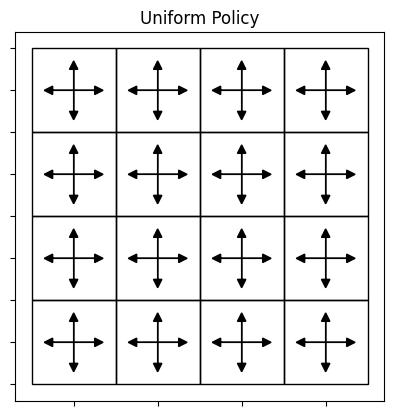

In [35]:
from matplotlib.patches import Rectangle 
def visualise_policy_simple(policy, title='Optimal Policy'):
    fig, ax = plt.subplots()
    dir = [(-1, 0), (0, -1), (1, 0), (0, 1)]
    for s in range(16):
        actions = policy[s]
        y, x= 4 - s//4, s%4
        ax.add_patch(Rectangle((x-0.5, y-0.5), 1, 1, fill=False, lw=1))
        for i, a in enumerate(actions):
            if a != 0:
                plt.arrow(x, y, 0.25*dir[i][0], 0.25*dir[i][1], head_width=0.1, head_length=0.1, color='black')
    # plt.grid()
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.axis('square')
    plt.title(title)
    plt.show()
    
visualise_policy_simple(uniform_policy(n_states, n_actions), title='Uniform Policy')

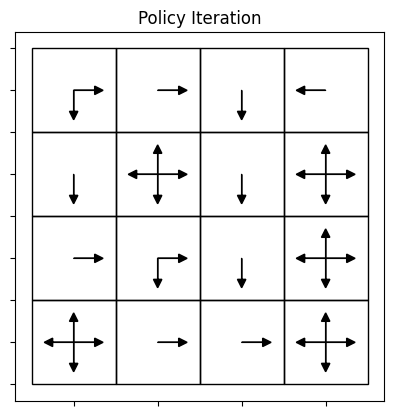

In [36]:
v_policy_iteration, p_policy_iteration, pi_its = policy_iteration(p_uniform, dynamics, n_states, n_actions, gamma=0.9, epsilon=1e-10)
visualise_policy_simple(p_policy_iteration, title='Policy Iteration')

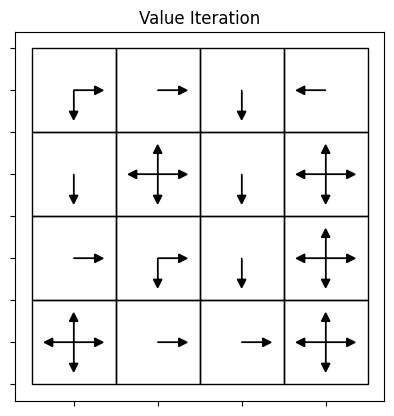

In [37]:
v_value_iteration, vi_its = value_iteration(dynamics, n_states, n_actions, gamma=0.9, epsilon=1e-10)
p_value_iteration = greedy(v_value_iteration, dynamics, n_states, n_actions, gamma=0.9)
visualise_policy_simple(p_value_iteration, title='Value Iteration')

In [38]:
print(f"Number of iterations for Policy Iteration: {pi_its}")
print(f"Number of iterations for Value Iteration: {vi_its}")

Number of iterations for Policy Iteration: 3
Number of iterations for Value Iteration: 7


In [39]:
print(f"Both methods converge to the same value, T/F?")
print(f"Answer: {np.all(v_policy_iteration == v_value_iteration )}")

Both methods converge to the same value, T/F?
Answer: True


**c) Are there any stochastic optimal policies ? If so, does any of the algorithm find any stochastic optimal policy ? If not, why not ?** <br>
**Solution:**<br>
Yes, there are stochastic optimal policies. One can see that the Frozen Lake example does have a stochastic optimal policy, since there exist states which have multiple optimal actions, and these actions are distributed uniformly. For example, in the top-left state, the optimal policy tells us that the agent is equally likely to go left or down.

**d) Programming a Custom Environment:** <br>
**Solution** <br>
The only functional difference between the old environment and the new one is the dynamics dictionary, which can be re-defined by subclassing the FrozenLakeEnv class

Note here that probability of success = (1-noise) and probability of failure = noise. I assume that the success probability is for a single action, while the failure probability is distributed uniformly across all leftover actions. <br><br>
##### Part i: The Implementation

In [40]:
from gymnasium.envs.toy_text.frozen_lake import FrozenLakeEnv
"""
  - 0: LEFT
  - 1: DOWN
  - 2: RIGHT
  - 3: UP
"""
class customLakeEnv(FrozenLakeEnv):
  def __init__(self, noise=0.0):
    super().__init__()
    
    self.desc = desc = [
      "FFFFF",
      "FWFFF",
      "FWtWT",
      "SFFFF",
      "CCCCC"
      
    ]
    
    self.nrow, self.ncol = nrow, ncol = 5, 5
    nS = nrow * ncol
    
    self.P = {s: {a: [] for a in range(4)} for s in range(nS)}
    
    def to_s(row, col):
      return row * ncol + col
    
    def inc(row, col, a):
      if a == 0:
        if (row, col) not in [(1, 2), (2, 2), (2, 4)] and col != 0:
          col -= 1
      elif a == 1:
        if (row, col) not in [(0, 1), (1, 3)] and row != nrow-1:
          row += 1
      elif a == 2:
        if (row, col) not in [(1, 0), (2, 0), (2, 2)] and col != ncol-1:
          col += 1
      elif a == 3:
        if (row, col) not in [(3, 1), (3, 3)] and row != 0:
          row -= 1
      return (row, col)
    
    def update_probability_matrix(row, col, action):
      newRow, newCol = inc(row, col, action)
      newstate = to_s(newRow, newCol)
      newLetter = desc[newRow][newCol]
      terminated = newLetter in 'CTt'
      if newLetter == 'C':
        reward = -10
      elif newLetter == 't':
        reward = 1
      elif newLetter == 'T':
        reward = 10
      else:
        reward = 0
      return newstate, reward, terminated
    
    for row in range(nrow):
      for col in range(ncol):
        s = to_s(row, col)
        for a in range(4):
          li = self.P[s][a]
          letter = desc[row][col]
          if letter == 'C':
            li.append((1.0, s, -10, True))
          elif letter == 't':
            li.append((1.0, s, 1, True))
          elif letter == 'T':
            li.append((1.0, s, 10, True))
          else:
            if noise == 0:
              newstate, reward, terminated = update_probability_matrix(row, col, a)
              li.append((1.0, newstate, reward, terminated))
            else:
              success_prob = 1 - noise
              failure_prob = noise/3
              _dynamics = []
              for action in range(4):
                if a == action:
                  successState, successReward, successTerminated = update_probability_matrix(row, col, action)
                  _dynamics.append((success_prob, successState, successReward, successTerminated))
                else:
                  failureState, failureReward, failureTerminated = update_probability_matrix(row, col, action)
                  _dynamics.append((failure_prob, failureState, failureReward, failureTerminated))
              encountered_probs = {}
              for prob, state, reward, terminated in _dynamics:
                if state not in encountered_probs:
                  encountered_probs[state] = prob
                else:
                  encountered_probs[state] += prob
              for state in encountered_probs:
                li.append((encountered_probs[state], state, reward, terminated))


In [41]:
def visualize_policy_simple_large(policy, title='Optimal Policy'):
    fig, ax = plt.subplots()
    dir = [(-1, 0), (0, -1), (1, 0), (0, 1)]
    for s in range(25):
        actions = policy[s]
        y, x= 5 - s//5, s%5
        ax.add_patch(Rectangle((x-0.5, y-0.5), 1, 1, fill=False, lw=1))
        for i, a in enumerate(actions):
            if a != 0:
                plt.arrow(x, y, 0.25*dir[i][0], 0.25*dir[i][1], head_width=0.1, head_length=0.1, color='black')
    # plt.grid()
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    ax.axis('square')
    plt.title(title)
    plt.show()

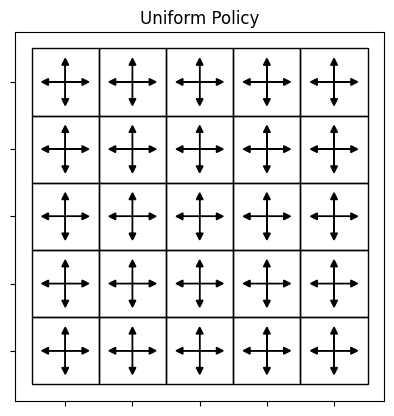

In [42]:
new_uniform_policy = uniform_policy(25, 4)
visualize_policy_simple_large(new_uniform_policy, title='Uniform Policy')

##### Part ii: Combinations of $\eta$ and $\gamma$:

1. Low $\eta$, low $\gamma$: This means that the environment is not particulary stochastic. The agent is more willing to risk falling into the cliff states, and thus takes the shorter route from the start state. The low $\gamma$ means that the agent prioritizes immediate rewards more, and we can see that the path it follows will lead it to the closer, but less rewarding goal state.

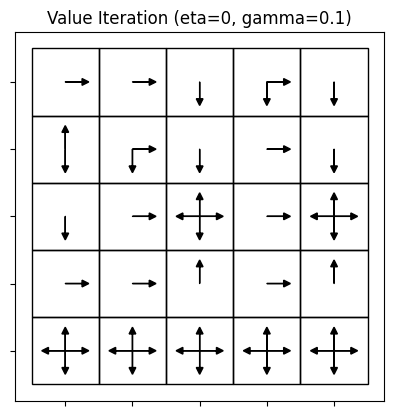

In [225]:
noise = 0
gamma = 0.1
custom_frozen_lake = customLakeEnv(noise=noise)
new_dynamics = custom_frozen_lake.unwrapped.P
v_value_iteration_new, vi_its_new = value_iteration(new_dynamics, 25, 4, gamma=gamma, epsilon=1e-10)
p_value_iteration_new = greedy(v_value_iteration_new, new_dynamics, 25, 4, gamma=gamma)
visualize_policy_simple_large(p_value_iteration_new, title=f'Value Iteration (eta={noise}, gamma={gamma})')

2. Low $\eta$, high $\gamma$: This means that the environment is once again, not very stochastic. The agent will take the shorter route that passes near the cliff states. High $\gamma$, however, means that future rewards are valued higher than immediate ones, leading to the agent taking the longer route to the more rewarding goal state.

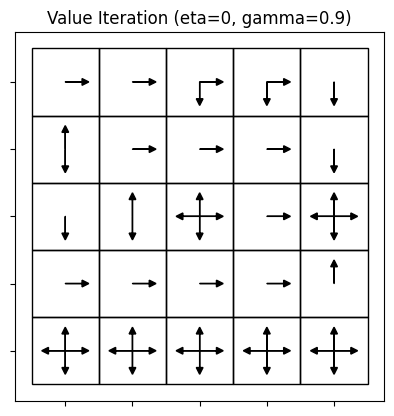

In [228]:
noise = 0
gamma = 0.9
custom_frozen_lake = customLakeEnv(noise=noise)
new_dynamics = custom_frozen_lake.unwrapped.P
v_value_iteration_new, vi_its_new = value_iteration(new_dynamics, 25, 4, gamma=gamma, epsilon=1e-10)
p_value_iteration_new = greedy(v_value_iteration_new, new_dynamics, 25, 4, gamma=gamma)
visualize_policy_simple_large(p_value_iteration_new, title=f'Value Iteration (eta={noise}, gamma={gamma})')

3. High $\eta$, low $\gamma$: This means that the environment is very stochastic. The combination of high $\eta$ and low $\gamma$ means that the agent will likely prioritize *not* entering falling off the cliff over actually reaching the goal state. As such, we can see that most of the policy is focused on avoiding the cliff states, without necessarily trying to reach the goal state.

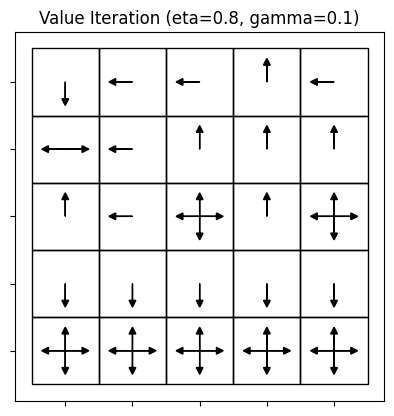

In [237]:
noise = 0.8
gamma = 0.1
custom_frozen_lake = customLakeEnv(noise=noise)
new_dynamics = custom_frozen_lake.unwrapped.P
v_value_iteration_new, vi_its_new = value_iteration(new_dynamics, 25, 4, gamma=gamma, epsilon=1e-10)
p_value_iteration_new = greedy(v_value_iteration_new, new_dynamics, 25, 4, gamma=gamma)
visualize_policy_simple_large(p_value_iteration_new, title=f'Value Iteration (eta={noise}, gamma={gamma})')

In the above diagram, we can see that the agent tries to move one state up from the start state, and then attempt to stay in place by moving to the left and the right, where there are walls present. It is also interesting to note that because the probability of failure is so high, the agent attempts to "trick" the environment when in the bottom row and tries to move *into* the cliff states. Since the likelihood that this will fail is 0.8, the agent is often able to avoid the cliff states by just trying to move into them.

4. High $\eta$, high $\gamma$: The environment is extremely stochastic, but the high $\gamma$ forces the agent to attempt to reach the goal states. This leads it to taking the longer, safer route to the goal state. Exactly how high $\gamma$ is will determine whether the agent tries to reach the closer goal state or the farther one.

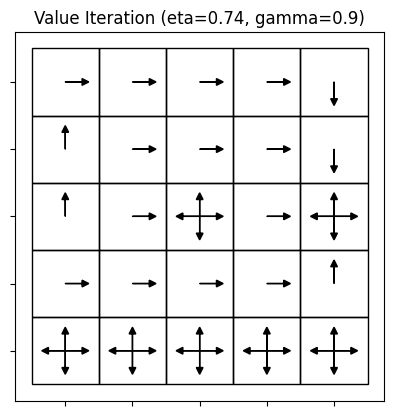

In [114]:
custom_frozen_lake = customLakeEnv(noise=0.74)
new_dynamics = custom_frozen_lake.unwrapped.P
gamma = 0.9
v_value_iteration_new, vi_its_new = value_iteration(new_dynamics, 25, 4, gamma=gamma, epsilon=1e-10)
p_value_iteration_new = greedy(v_value_iteration_new, new_dynamics, 25, 4, gamma=gamma)
visualize_policy_simple_large(p_value_iteration_new, title='Value Iteration (eta=0.74, gamma=0.9)')

The above diagram is an example of the agent trying to reach the farther goal state, since $\gamma = 0.9$ is high enough to outweigh the potential risk of falling into the cliff states. That same risk is minimized by moving through the longer route up from the start state.  (Note here that $\eta = 0.74$ was chosen so that the possibility of success when attempting an action is only *slightly* higher than the possibility of failure.) 

##### Part iii: 
From the above, we can see that scaling the discount factor by a constant factor $k \in (0, 1)$ tends to change to optimal policy, biasing the agent towards moving into a closer goal state. 